In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cardio = pd.read_csv('/Users/oobijosyy/Desktop/MAD Final/cardio_train.csv', delimiter = ";")

# adjust "age" column
cardio['age'] = cardio['age'].astype(int)
cardio['age'] = cardio['age'] // 365

print(cardio)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1

In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003814  0.003502 -0.003038 -0.001830  0.003356   
age          0.003814  1.000000 -0.022913 -0.081506  0.053561  0.020854   
gender       0.003502 -0.022913  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081506  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053561  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020854  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017620  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154012 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098388 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047649  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029756  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009998  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

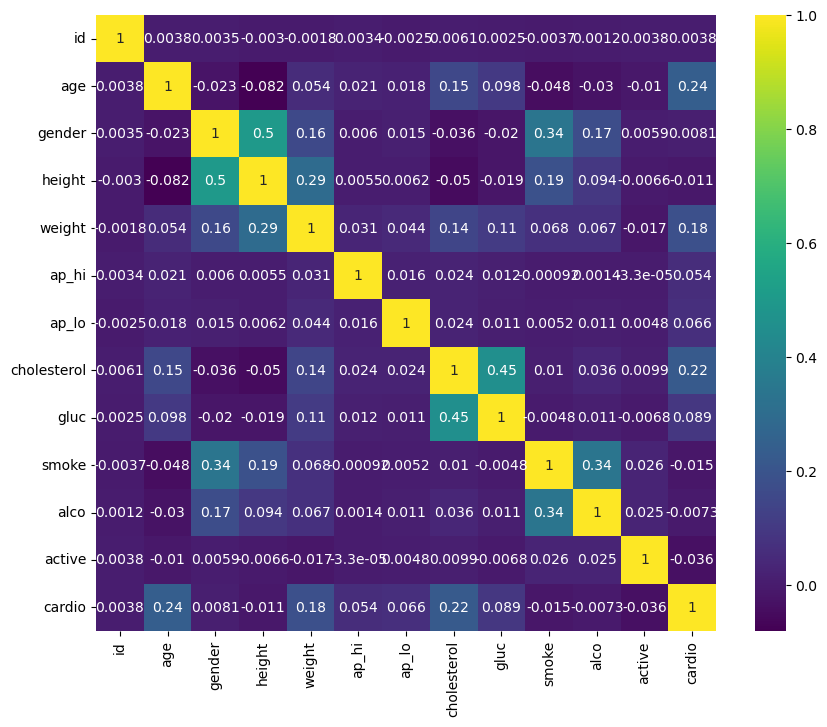

In [5]:
correlation = cardio.corr()
print(correlation)

plt.figure(figsize = (10,8))
sns.heatmap(cardio.corr(), annot = True, cmap='viridis')
plt.show()

In [6]:
X = cardio[['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']]
y = cardio['cardio']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [7]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
# train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# evaluate the performance of the model on the training data
train_prediction = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(f'Training Accuracy: {train_accuracy}')

# evaluate the performance of the model on the testing data
test_prediction = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.7173035714285714
Testing Accuracy: 0.7200714285714286


In [8]:
# decision tree model

from sklearn.tree import DecisionTreeClassifier
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# evaluate the performance of the model on the training data
train_prediction = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(f'Training Accuracy: {train_accuracy}')

# evaluate the performance of the model on the testing data
test_prediction = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.8681428571428571
Testing Accuracy: 0.6635714285714286


In [9]:
from pprint import pprint
pprint(dt.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [10]:
# improve decision tree model through hyperparameter tuning

# Define hyperparameters for hyperparameter tuning
max_depth_values = [3, 5, 7]
min_samples_split_values = [2, 5, 7, 8]
min_samples_leaf_values = [1, 2, 4]

# set the initial best_accuracy to be 0 for further comparison
best_accuracy = 0

# Go through each combination of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:

            dt = DecisionTreeClassifier(max_depth = max_depth,
                                        min_samples_split = min_samples_split,
                                        min_samples_leaf = min_samples_leaf)
            dt.fit(X_train, y_train)
            test_prediction = dt.predict(X_test)
            current_accuracy = accuracy_score(y_test, test_prediction)
            
            # Check if current accuracy is better than the previous best accuracy
            # set the best accuracy and best combination
            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_combination = [max_depth, min_samples_split, min_samples_leaf]

In [11]:
# Compare training accuracy and testing accuracy after hyperparameter tuning
best_dt = DecisionTreeClassifier(max_depth = best_combination[0],
                                 min_samples_split = best_combination[1],
                                 min_samples_leaf = best_combination[2])

# train the optimal decision tree model
best_dt.fit(X_train, y_train)

# evaluate the performance of the optimal decision tree model on the training data
train_prediction = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# evaluate the performance of the optimal decision tree model on the testing data
test_accuracy = accuracy_score(y_test, test_prediction)
test_prediction = best_dt.predict(X_test)

# compare the overall accuracy of the optimal deicision tree model
print(f'Overall accuracy -> training accuracy: {train_accuracy}')
print(f'Overall accuracy -> testing accuracy: {test_accuracy}')

Overall accuracy -> training accuracy: 0.7320535714285714
Overall accuracy -> testing accuracy: 0.7340714285714286


In [12]:
# random forest

from sklearn.ensemble import RandomForestClassifier
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# evaluate the performance of the model on training data
train_prediction = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(f'Training Accuracy: {train_accuracy}')

# evaluate the performance of the model on training data
test_prediction = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.8681428571428571
Testing Accuracy: 0.6979285714285715


In [13]:
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [14]:
# improve random forest model through hyperparameter tuning

# Define hyperparameters for hyperparameter tuning
max_depth_values = [50, 70, 90]
min_samples_leaf_values = [3, 4, 5]
min_samples_split_values = [8, 10, 12]
n_estimators_values = [100, 200]

# set the initial best_accuracy to be 0 for further comparison
best_accuracy = 0

# Go through each combination of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimators_values:
                
                rf = RandomForestClassifier(max_depth = max_depth,
                                            min_samples_split = min_samples_split,
                                            min_samples_leaf = min_samples_leaf,
                                            n_estimators = n_estimators)
                
                rf.fit(X_train, y_train)
                test_prediction = rf.predict(X_test)
                current_accuracy = accuracy_score(y_test, test_prediction)
                # Check if current accuracy is better than the previous best accuracy
                # set the best accuracy and best combination
                if current_accuracy > best_accuracy:
                    best_accuracy = current_accuracy
                    best_combination = [max_depth, min_samples_split, min_samples_leaf, n_estimators]

In [15]:
best_rf = RandomForestClassifier(max_depth = best_combination[0],
                                 min_samples_split = best_combination[1],
                                 min_samples_leaf = best_combination[2],
                                 n_estimators = best_combination[3])

# train the optimal random forest model
best_rf.fit(X_train, y_train)

# evaluate the performance of the optimal random forest model on the training data
train_prediction = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# evaluate the performance of the optimal random forest model on the testing data
test_accuracy = accuracy_score(y_test, test_prediction)
test_prediction = best_rf.predict(X_test)

# compare the overall accuracy of the optimal random forest model
print(f'Overall accuracy -> training accuracy: {train_accuracy}')
print(f'Overall accuracy -> testing accuracy: {test_accuracy}')

Overall accuracy -> training accuracy: 0.7664642857142857
Overall accuracy -> testing accuracy: 0.7365


In [16]:
# svm
from sklearn.svm import SVC
# train svm
svc = SVC()
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# evaluate the performance of svm on the training data
train_prediction = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print(f'Training Accuracy: {train_accuracy}')

# evaluate the performance of svm on the testing data
test_prediction = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.7198392857142857
Testing Accuracy: 0.7229285714285715


In [17]:
print("Enter your information for prediction... ")
age = int(input("Your Age: "))
weight = int(input("Your rounded weight in kg: "))
ap_hi = int(input("Your systolic blood pressure: "))
ap_lo = int(input("Your diastolic blood pressure: "))
cholesterol = input("Your cholesterol level (normal, above normal, or well above normal): ")
gluc = input("Your glucose level (normal, above normal, or well above normal): ")

# convert user "cholesterol" input to corresponding level
if cholesterol == "normal":
    cholesterol = 1
elif cholesterol == "above normal":
    cholesterol = 2
elif cholesterol == "well above normal":
    cholesterol = 3
# convert user "gluc" input to corresponding level
if gluc == "normal":
    gluc = 1
elif gluc == "above normal":
    gluc = 2
elif gluc == "well above normal":
    gluc = 3

# make prediction according to user input (using random forest model)
prediction_value = rf.predict([[age, weight, ap_hi, ap_lo, cholesterol, gluc]])

# print out the prediction based on the output value of the model
if prediction_value == 0:
    print("According to our prediction model, you are not considered to have cardiovascular disease.")
else:
    print("According to our prediction model, you are considered to have cardiovascular disease.")

Enter your information for prediction... 
Your Age: 62
Your rounded weight in kg: 70
Your systolic blood pressure: 170
Your diastolic blood pressure: 100
Your cholesterol level (normal, above normal, or well above normal): normal
Your glucose level (normal, above normal, or well above normal): normal
According to our prediction model, you are considered to have cardiovascular disease.


/Users/oobijosyy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
# sample input:
# age = 62
# weight = 70
# ap_hi = 170
# ap_lo = 100
# cholesterol = "normal"
# gluc = "normal"

29
64


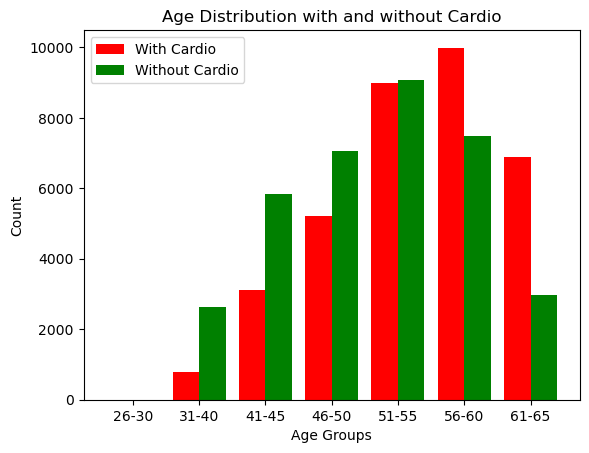

10.0
200.0


In [19]:
# Age comparison bar-chart

import matplotlib.pyplot as plt
import numpy as np

ages = cardio['age']
cardio_values = cardio['cardio']
print(min(cardio['age']))
print(max(cardio['age']))

age_cardio = []
age_none = []

for age, cardio_value in zip(ages, cardio_values):
    if cardio_value == 0:
        age_none.append(age)
    elif cardio_value == 1:
        age_cardio.append(age)

age_groups = ['26-30', '31-40', '41-45', '46-50', '51-55', '56-60', '61-65']

Age_CardioA = []
Age_CardioB = []
Age_CardioC = []
Age_CardioD = []
Age_CardioE = []
Age_CardioF = []
Age_CardioG = []
for age in age_cardio:
    if 26 <= age <= 30:
        Age_CardioA.append(age)
    elif 31 <= age <= 40:
        Age_CardioB.append(age)
    elif 41 <= age <= 45:
        Age_CardioC.append(age)
    elif 46 <= age <= 50:
        Age_CardioD.append(age)
    elif 51 <= age <= 55:
        Age_CardioE.append(age)
    elif 56 <= age <= 60:
        Age_CardioF.append(age)
    elif 61 <= age <= 65:
        Age_CardioG.append(age)

Age_NoneA = []
Age_NoneB = []
Age_NoneC = []
Age_NoneD = []
Age_NoneE = []
Age_NoneF = []
Age_NoneG = []
for age in age_none:
    if 26 <= age <= 30:
        Age_NoneA.append(age)
    elif 31 <= age <= 40:
        Age_NoneB.append(age)
    elif 41 <= age <= 45:
        Age_NoneC.append(age)
    elif 46 <= age <= 50:
        Age_NoneD.append(age)
    elif 51 <= age <= 55:
        Age_NoneE.append(age)
    elif 56 <= age <= 60:
        Age_NoneF.append(age)
    elif 61 <= age <= 65:
        Age_NoneG.append(age)


age_counts_Cardio = [len(Age_CardioA), len(Age_CardioB), len(Age_CardioC), len(Age_CardioD),
                     len(Age_CardioE), len(Age_CardioF), len(Age_CardioG)]
age_counts_None = [len(Age_NoneA), len(Age_NoneB), len(Age_NoneC), len(Age_NoneD), 
                   len(Age_NoneE), len(Age_NoneF), len(Age_NoneG)]

pos = np.arange(len(age_groups))

# Width of each bar
width = 0.4

plt.bar(pos, age_counts_Cardio, width, label='With Cardio', color='red')
plt.bar(pos + width, age_counts_None, width, label='Without Cardio', color='green')

plt.ylabel('Count')
plt.xlabel('Age Groups')
plt.title('Age Distribution with and without Cardio')
plt.xticks(pos + width / 2, age_groups)
plt.legend()
plt.show()

weight = cardio['weight']
cardio_values = cardio['cardio']

print(min(cardio['weight']))
print(max(cardio['weight']))

10.0
200.0


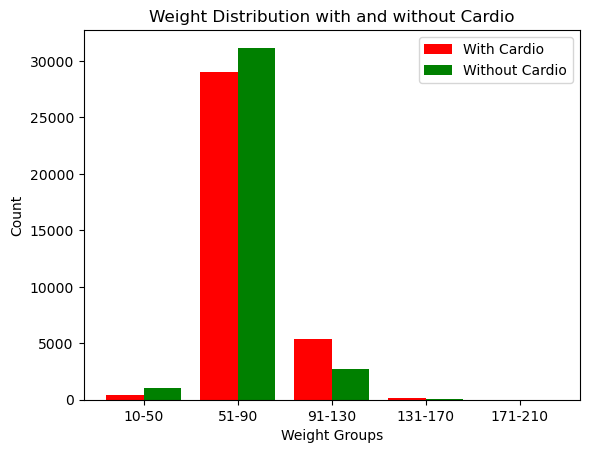

In [20]:
# Weight comparison bar-chart

import matplotlib.pyplot as plt
import numpy as np

weight = cardio['weight']
cardio_values = cardio['cardio']

print(min(cardio['weight'])) # 10.0
print(max(cardio['weight'])) # 200.0

weight_cardio = []
weight_none = []

for weight_val, cardio_value in zip(weight, cardio_values):
    if cardio_value == 0:
        weight_none.append(weight_val)
    elif cardio_value == 1:
        weight_cardio.append(weight_val)

weight_groups = ['10-50', '51-90', '91-130', '131-170', '171-210']

Weight_CardioA = []
Weight_CardioB = []
Weight_CardioC = []
Weight_CardioD = []
Weight_CardioE = []

for weight in weight_cardio:
    if 10 <= weight <= 50:
        Weight_CardioA.append(weight)
    elif 51 <= weight <= 90:
        Weight_CardioB.append(weight)
    elif 91 <= weight <= 130:
        Weight_CardioC.append(weight)
    elif 131 <= weight <= 170:
        Weight_CardioD.append(weight)
    elif 171 <= weight <= 210:
        Weight_CardioE.append(weight)
    

Weight_NoneA = []
Weight_NoneB = []
Weight_NoneC = []
Weight_NoneD = []
Weight_NoneE = []

for weight in weight_none:
    if 10 <= weight <= 50:
        Weight_NoneA.append(weight)
    elif 51 <= weight <= 90:
        Weight_NoneB.append(weight)
    elif 91 <= weight <= 130:
        Weight_NoneC.append(weight)
    elif 131 <= weight <= 170:
        Weight_NoneD.append(weight)
    elif 171 <= weight <= 210:
        Weight_NoneE.append(weight)
    


weight_counts_Cardio = [len(Weight_CardioA), len(Weight_CardioB), len(Weight_CardioC), len(Weight_CardioD),
                     len(Weight_CardioE)]
weight_counts_None = [len(Weight_NoneA), len(Weight_NoneB), len(Weight_NoneC), len(Weight_NoneD), 
                   len(Weight_NoneE)]

pos = np.arange(len(weight_groups))

# Width of each bar
width = 0.4

plt.bar(pos, weight_counts_Cardio, width, label='With Cardio', color='red')
plt.bar(pos + width, weight_counts_None, width, label='Without Cardio', color='green')

plt.ylabel('Count')
plt.xlabel('Weight Groups')
plt.title('Weight Distribution with and without Cardio')
plt.xticks(pos + width / 2, weight_groups)
plt.legend()
plt.show()

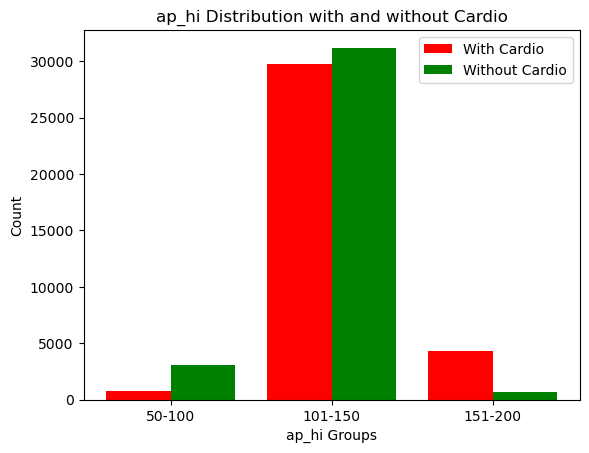

In [21]:
# ap_hi comparison bar-chart

import matplotlib.pyplot as plt
import numpy as np

ap_hi = cardio['ap_hi']
cardio_values = cardio['cardio']

ap_hi_cardio = []
ap_hi_none = []

for ap_hi_val, cardio_value in zip(ap_hi, cardio_values):
    if cardio_value == 0:
        ap_hi_none.append(ap_hi_val)
    elif cardio_value == 1:
        ap_hi_cardio.append(ap_hi_val)

ap_hi_groups = ['50-100', '101-150', '151-200']

ap_hi_CardioA = []
ap_hi_CardioB = []
ap_hi_CardioC = []


for ap_hi in ap_hi_cardio:
    if 50 <= ap_hi <= 100:
        ap_hi_CardioA.append(ap_hi)
    elif 101 <= ap_hi <= 150:
        ap_hi_CardioB.append(ap_hi)
    elif 151 <= ap_hi <= 200:
        ap_hi_CardioC.append(ap_hi)
    
    
ap_hi_NoneA = []
ap_hi_NoneB = []
ap_hi_NoneC = []

for ap_hi in ap_hi_none:
    if 50 <= ap_hi <= 100:
        ap_hi_NoneA.append(ap_hi)
    elif 101 <= ap_hi <= 150:
        ap_hi_NoneB.append(ap_hi)
    elif 151 <= ap_hi <= 200:
        ap_hi_NoneC.append(ap_hi)
    


ap_hi_counts_Cardio = [len(ap_hi_CardioA), len(ap_hi_CardioB), len(ap_hi_CardioC)]
ap_hi_counts_None = [len(ap_hi_NoneA), len(ap_hi_NoneB), len(ap_hi_NoneC)]

pos = np.arange(len(ap_hi_groups))

# Width of each bar
width = 0.4

plt.bar(pos, ap_hi_counts_Cardio, width, label = 'With Cardio', color = 'red')
plt.bar(pos + width, ap_hi_counts_None, width, label = 'Without Cardio', color = 'green')

plt.ylabel('Count')
plt.xlabel('ap_hi Groups')
plt.title('ap_hi Distribution with and without Cardio')
plt.xticks(pos + width / 2, ap_hi_groups)
plt.legend()
plt.show()

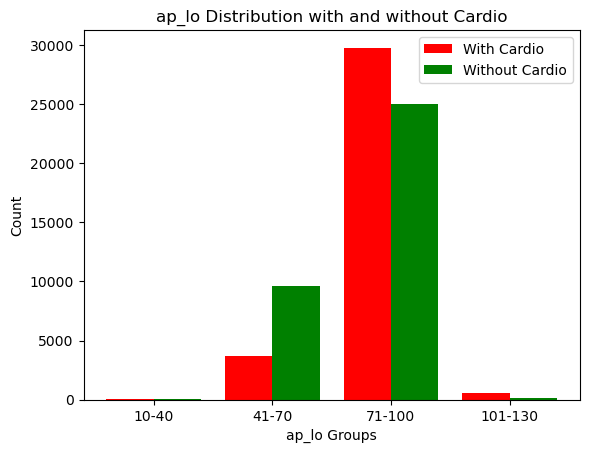

In [22]:
import matplotlib.pyplot as plt
import numpy as np

ap_lo = cardio['ap_lo']
cardio_values = cardio['cardio']

ap_lo_cardio = []
ap_lo_none = []

for ap_lo_val, cardio_value in zip(ap_lo, cardio_values):
    if cardio_value == 0:
        ap_lo_none.append(ap_lo_val)
    elif cardio_value == 1:
        ap_lo_cardio.append(ap_lo_val)

ap_lo_groups = ['10-40', '41-70', '71-100', '101-130']

ap_lo_CardioA = []
ap_lo_CardioB = []
ap_lo_CardioC = []
ap_lo_CardioD = []

for ap_lo in ap_lo_cardio:
    if 10 <= ap_lo <= 40:
        ap_lo_CardioA.append(ap_lo)
    elif 41 <= ap_lo <= 70:
        ap_lo_CardioB.append(ap_lo)
    elif 71 <= ap_lo <= 100:
        ap_lo_CardioC.append(ap_lo)
    elif 101 <= ap_lo <= 130:
        ap_lo_CardioD.append(ap_lo)


ap_lo_NoneA = []
ap_lo_NoneB = []
ap_lo_NoneC = []
ap_lo_NoneD = []

for ap_lo in ap_lo_none:
    if 10 <= ap_lo <= 40:
        ap_lo_NoneA.append(ap_lo)
    elif 41 <= ap_lo <= 70:
        ap_lo_NoneB.append(ap_lo)
    elif 71 <= ap_lo <= 100:
        ap_lo_NoneC.append(ap_lo)
    elif 101 <= ap_lo <= 130:
        ap_lo_NoneD.append(ap_lo)

    


ap_lo_counts_Cardio = [len(ap_lo_CardioA), len(ap_lo_CardioB), len(ap_lo_CardioC), len(ap_lo_CardioD)]
ap_lo_counts_None = [len(ap_lo_NoneA), len(ap_lo_NoneB), len(ap_lo_NoneC), len(ap_lo_NoneD)]

pos = np.arange(len(ap_lo_groups))

# Width of each bar
width = 0.4

plt.bar(pos, ap_lo_counts_Cardio, width, label='With Cardio', color='red')
plt.bar(pos + width, ap_lo_counts_None, width, label='Without Cardio', color='green')

plt.ylabel('Count')
plt.xlabel('ap_lo Groups')
plt.title('ap_lo Distribution with and without Cardio')
plt.xticks(pos + width / 2, ap_lo_groups)
plt.legend()
plt.show()

### Code Reference
https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/